# **Estudando MÉTODOS NUMÉRICOS**
## **Método da Bissecção**

## **Bibliotecas utilizadas:**


In [1]:
# Alguns comandos p/ verificar info do ambiente, atualizar e verificar versões dos pacotes:
!python3 --version
# !lsb_release -d
# !pip show numba numpy
# !pip install --upgrade numba numpy

Python 3.10.12


In [2]:
# Voltando a estudar Cálculo Numérico / Métodos Numéricos e Aplicações
# MAP-3121 / IME/USP / https://edisciplinas.usp.br/course/view.php?id=107166

import math, numpy as np, numba, matplotlib.pyplot as plt, time

print(f'NumPy {np.__version__}\nNumba {numba.__version__}')

NumPy 1.26.1
Numba 0.58.1


**Algumas variáveis globais que usaremos entre as células de código:**

In [6]:
# ENTRADA
num = 2                # num é o número que se quer achar a raiz
intervalo_ab = [1, 2]  # intervalo de busca da raiz
precisao = 0.00000001

# SAÍDA
comparacao = dict()

## **Testando NumPy / achando raízes de equações quadradas**

In [ ]:
# calcular solução da eq. x^2 − 6x + 7 = 0, expressar com erro inferior a 10^−10
a, b, c = 1, -6, 7
delta = b ** 2 - 4 * a * c  # usando bhaskara
x_1 = (-b - np.sqrt(delta)) / (2 * a)
x_2 = (-b + np.sqrt(delta)) / (2 * a)
print(f'x_1 = {x_1:.10f}\nx_2 = {x_2:.10f}\n')  # expressando com erro < 10^-10

x_1 = 1.5857864376
x_2 = 4.4142135624



## **Testando NumPy / Matplotlib / plotando a raiz quadrada de 2 no gráfico**
Vamos plotar y = f(x) = x^2 - 2,

se y = 0, temos a raiz quadrada de 2

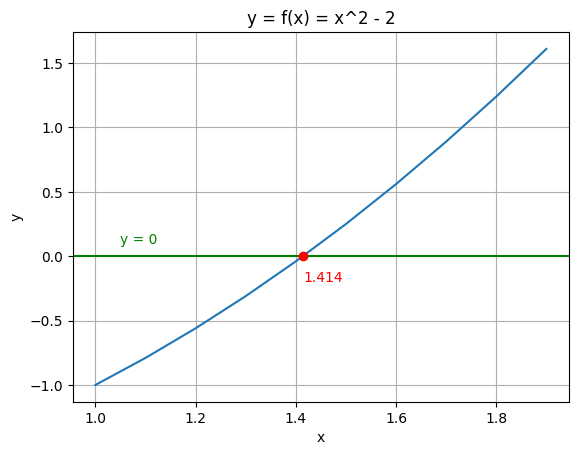

In [ ]:
# p/ chegar na raiz de 2:
# raiz(2) = x --> 2 = x^2 --> x^2 - 2 = 0 --> y = f(x) = x^2 - 2, com f(x) = 0 é onde nossa curva cruza o eixo x

x = np.arange(1, 2, 0.1)
y = np.power(x, 2) - 2  # x^2 - 2

plt.plot(x, y)
plt.title('y = f(x) = x^2 - 2')
plt.xlabel('x')
plt.ylabel('y')

plt.axhline(y=0, color='green', linestyle='-')
plt.text(1.05, +0.1, s='y = 0', color='green')

r2 = np.sqrt(2)
plt.plot(r2, 0, marker="o", color='red')
plt.text(r2, -0.2, s=str(round(r2, 3)), color='red')

plt.grid()

## **1ª implementação - rudimentar c/ incremento**
**Desenvolvendo um método / algoritmo p/ se obter raiz quadrada de 2 (sem utilizar math.sqrt() ou numpy.sqrt()),**

o algoritmo abaixo ficou bastante lento, a ideia é ir incrementando um valor (passo) desde o número 1 até chegar na raiz quadrada de 2.

In [ ]:
# desenvolver método / algoritmo p/ raiz quadrada de 2, considerando erro inferior a 10^-10

start_t = time.time()
# x = 1.0
x = intervalo_ab[0]  # está definido na célula de entrada deste notebook
# precisao = 0.0000000001
# precisao = 0.001
passo = precisao / 2.0
i = 0
while True:
    x = x + passo
    i += 1
    # erro = 1.41421356237 - x  # usando 10^-11 p/ se chegar a erro inferior a 10^-10, usar precisao = 0.0000000001
    erro = x ** 2 - num
    if abs(erro) < precisao or x > intervalo_ab[1]:
        break

t_total = time.time() - start_t
comparacao['implementacao_1'] = (t_total, i)
print(f'\nerro =     {abs(erro):.12f}\nprecisao = {precisao:.10f}\n\nraiz de {num} (aprox.):    {x:.10f} --> x * x = {x * x:.10f}\nraiz de {num} (np.sqrt()): {np.sqrt(num):.11f}')
print(f'\nnumero de passos: {i}\ntempo decorrido: {t_total * 1000.0 :.3f} ms / {t_total:.3f} segundos / {t_total / 60.0:.1f} minutos')
#
# i = 4142135280 p/ precisao = 0.0000000001, passo = precisao
#
# usando precisao = 0.0000000001 / 10^(-10):
# tempo decorrido: 1253.8 segundos, 20.9 min -- google colab, sem abs()
# tempo decorrido: 1663.6 segundos, 27.7 min -- google colab, c/ abs()
# tempo decorrido: 861.4 segundos -- core i5-10400F c/ abs()
# tempo decorrido: 689.7 segundos -- core i5-10400F sem abs()
#
# precisao = 0.0000000001, passo = precisao / 2.0
# numero de passos: 8284270562
# tempo decorrido: 4445.267 segundos - 74.1 minutos


erro =     0.000000036914
precisao = 0.0000001000

raiz de 2 (aprox.):    1.4142135493 --> x * x = 1.9999999631
raiz de 2 (np.sqrt()): 1.41421356237

numero de passos: 8284271
tempo decorrido: 4429.749 ms / 4.430 segundos / 0.1 minutos


## **2ª implementação - rudimentar c/ incremento usando Numba**

**Abaixo utilizamos a biblioteca Numba p/ acelerar as coisas,**

mas ainda assim o algoritmo leva muitos passos p/ obter a raiz quadrada de 2

In [33]:

@numba.njit
def calc_raiz_2(num, a, b, precisao):
  # x = 1.0
  x = a
  passo = precisao / 2.0  # se não usar um passo menor que a precisão, corre o risco de ficar preso dentro do loop
  i = 0
  while True:
    x += passo
    i += 1
    erro = x ** 2 - num
    if abs(erro) < precisao or x > b:
      break
  return x, erro, i


# precisao = 0.0000000001  # 10^(-10)
# precisao = 0.001

#start_t = time.time()
x, erro, n = calc_raiz_2(num, intervalo_ab[0], intervalo_ab[1], precisao)
#t_total = time.time() - start_t

start_t = time.time()
calc_raiz_2(num, intervalo_ab[0], intervalo_ab[1], precisao)
t_total = time.time() - start_t

print(f'\nerro =     {abs(erro):.12f}\nprecisao = {precisao:.10f}\n\nraiz de {num} (aprox.):      {x} --> x * x = {x * x}\nraiz de {num} (math.sqrt()): {math.sqrt(num)}')
comparacao['implementacao_2_numba'] = (t_total, n)
print(f'\nnumero de passos: {n}\ntempo decorrido: {t_total * 1000.0 :.3f} ms / {t_total:.3f} segundos / {t_total / 60.0:.1f} minutos')

# precisao = 0.0000000001, passo = precisao / 2.0
# numero de passos: 8284270562
# tempo decorrido: 16.128 segundos - 0.3 minutos


erro =     0.000000000310
precisao = 0.0000000100

raiz de 2 (aprox.):      1.414213562482629 --> x * x = 2.000000000309809
raiz de 2 (math.sqrt()): 1.4142135623730951

numero de passos: 82842713
tempo decorrido: 105.749 ms / 0.106 segundos / 0.0 minutos


In [44]:
%timeit calc_raiz_2(num, intervalo_ab[0], intervalo_ab[1], precisao)
# precisao = 0.00000001, passo = precisao / 2.0
# numero de passos: 82842713
# 107 ms ± 4.5 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)

112 ms ± 7.56 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


## **Tentando entender o Método da Bissecção:**

O que fizemos até agora funciona, porém quanto maior a precisão escolhida maior o tempo p/ se achar a raiz, e no Método Numérico achamos uma solução mais eficiente p/ o problema.

Com o **método de bissecção**, a estimativa vai convergindo de forma rápida p/ o valor da raiz.

https://pt.wikipedia.org/wiki/M%C3%A9todo_da_bisse%C3%A7%C3%A3o

In [ ]:

a, b = 1, 2

# print(math.sqrt(a * b), ',', (a + b) / 2.0, '\n')  # quem é maior?

def fx(x):
  y = x ** 2 - 2
  return y

print(fx(a), ',', fx(b))  # f(a) * f(b) < 0, intervalo válido
p0 = (a + b) / 2

print(fx(p0) * fx(a), ',', fx(p0) * fx(b))  # f(p0) * f(a) < 0, então b = p0 e recalculamos p0
a = a
b = p0
p0 = (a + b) / 2

print(fx(p0) * fx(a), ',', fx(p0) * fx(b))  # f(p0) * f(b) < 0, então a = p0 e recalculamos p0
a = p0
b = b
p0 = (a + b) / 2

print(fx(p0) * fx(a), ',', fx(p0) * fx(b))
a = p0
b = b
p0 = (a + b) / 2

print(fx(p0) * fx(a), ',', fx(p0) * fx(b))
a = a
b = p0
p0 = (a + b) / 2

print(fx(p0) * fx(a), ',', fx(p0) * fx(b))

print('\nraiz de 2: ', p0)
print('erro:     ', math.sqrt(2.0) - p0)

-1 , 2
-0.25 , 0.5
0.4375 , -0.109375
0.0478515625 , -0.02734375
-0.00726318359375 , 0.0166015625
0.0024566650390625 , -0.001491546630859375

raiz de 2:  1.40625
erro:      0.007963562373095145


## **3ª implementação - c/ Método da Bissecção**

**Implementando o método de bissecção:**

In [50]:

def fx(x: float, num: float) -> float:
  return x ** 2 - num

def procura_raiz(num, intervalo, precisao):
  """

  :param num: número que iremos extrair a raiz
  :param intervalo: list ou tuple de 2 elementos representando o intervalo min e max, ex: [1, 2]
  :param precisao: precisão da raiz de num, esta função tentará obter erro < precisao
  :return: p (raiz quadrada de num), (erro de n-1, erro), i (passos)
  """

  a, b = intervalo[0], intervalo[1]
  fxa, fxb = fx(a, num), fx(b, num)

  if fxa * fxb < 0:
    p = (a + b) / 2.0
    fxp = fx(p, num)
  elif fxa * fxb > 0:
    return math.nan, (math.nan, math.nan), -1  # retornando número de passos i = -1, intervalo [a b] inválido para achar raiz de num

  i = 0
  while(True):
    i += 1
    if fxp * fxa < 0:
      b, fxb = p, fxp
    elif fxp * fxb < 0:
      a, fxa = p, fxp

    p = ((a + b) / 2.0)
    # print(p == a, p == b, (p == a) or (p == b))
    erro_anterior = fxp
    fxp = fx(p, num)

    if abs(fxp) < precisao or (p == a) or (p == b):  # abs(erro) < precisao; com precisao < 5 * 10^(-16) ficamos preso dentro do loop, ver sys.float_info
      break

  return p, (erro_anterior, fxp), i


# ENTRADA
# num = 2      # num é o número que se quer achar a raiz
# intervalo_ab = [1, 2]  # intervalo

# precisao = 0.0000000000000005  # limite é 5 * 10^(-16)
# precisao = 0.000000000000001

# EXTRAINDO A RAIZ, chamando a função
start_t = time.time()
x, erros, n = procura_raiz(float(num), intervalo_ab, precisao)
t_total = time.time() - start_t

# SAÍDA, mostrando na tela
if n >= 0:
  print(f'\nIremos extrair a raiz quadrada de: {num}\nIntervalo de busca: {intervalo_ab}')
  print(f'\nerro(n-1) = {abs(erros[0]):.16f}\nerro =      {abs(erros[1]):.16f}\nprecisao =  {precisao:.15f}\n\nraiz de {num} (aprox.):      {x} --> x^2 = {x ** 2}\nraiz de {num} (math.sqrt()): {math.sqrt(num)}')
  comparacao['implementacao_3_bissecao'] = (t_total, n)
  print(f'\nnumero de passos: {n}\ntempo decorrido: {t_total * 1000.0 :.3f} ms / {t_total:.3f} s / {t_total / 60.0:.2f} min')
if n == -1:
  print(f'\nos números do intervalo {intervalo_ab} são inválidos p/ se obter a raiz de {num}, forneça outro intervalo.')

if precisao < abs(erros[1]):
  print(f'\nraiz obtida tem precisao de {erros[1]} (valor do erro), o valor de precisão escolhido é muito baixo ({precisao}), escolha um número maior p/ a precisão.')



Iremos extrair a raiz quadrada de: 2
Intervalo de busca: [1, 2]

erro(n-1) = 0.0000000263102355
erro =      0.0000000052368114
precisao =  0.000000010000000

raiz de 2 (aprox.):      1.4142135605216026 --> x^2 = 1.9999999947631886
raiz de 2 (math.sqrt()): 1.4142135623730951

numero de passos: 26
tempo decorrido: 0.099 ms / 0.000 s / 0.00 min


In [52]:
%timeit procura_raiz(num, intervalo_ab, precisao)
# precisao = 0.00000001
# numero de passos: 26
# 10.4 µs ± 2.57 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)

10.2 µs ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## **Utilizando o Método de Bissecção implementado p/ outros fins**

**Calculando as raízes de equações de 2º grau usando o método de bissecção implementado**

Para isso precisaríamos reimplementar a fx() p/ ficar de acordo com a equação proposta, e também precisaríamos passar 2 intervalos diferentes, um p/ cada raiz, chamando assim duas vezes a procura_raiz()...

Ficaria assim:



```
def fx(x: float, coefs) -> float:

  if type(coefs) == int or type(coefs) == float:
    coefs = [1, 0, - coefs]  # equação ficará como: y = x ** 2 - c, ou seja, p/ achar raiz simples de um número
  
  return coefs[0] * x ** 2 + coefs[1] * x + coefs[2]  # y = a * x^2 + b * x + c
```



Ou podemos simplesmente criar uma função específica p/ obter solução das eq. de 2º grau, e dentro dela chamar a procura_raiz() p/ obter a raiz de Δ (delta) (usaremos fórmula de Bhaskara!!).


In [ ]:

def procura_raizes_eq_2_grau(coefs, intervalo, precisao):

  delta = coefs[1] ** 2 - 4 * coefs[0] * coefs[2]  # delta = b^2 - 4ac

  if delta < 0:
    x_1, x_2 = float('NaN'), float('NaN')  # não há raiz real
    erros = math.nan
    n = -2
  elif delta == 0:
    x_1 = - coefs[1] / (2 * coefs[0])  # também é o ponto min / max da equação
    x_2 = x_1
    erros = (0, 0)
    n = 0
  else:
    raiz_delta, erros, n = procura_raiz(delta, intervalo, precisao)
    x_1 = (- coefs[1] - raiz_delta) / (2 * coefs[0])
    x_2 = (- coefs[1] + raiz_delta) / (2 * coefs[0])

  return (x_1, x_2), erros, n

# ENTRADA
coefs_da_eq = [1, -6, 7]  # y = x^2 − 6x + 7 = 0
intervalo_ab_2 = [0, 15]  # intervalo

precisao_2 = 0.1

# CALCULANDO AS RAIZES da eq. 2º grau, chamando a função implementada acima
raizes, erros, n = procura_raizes_eq_2_grau(coefs_da_eq, intervalo_ab_2, precisao_2)

# SAÍDA, mostrando na tela
try:
  if n == -1:
    print('\nAumente o intervalo escolhido!! Não foi possível calcular a raiz de delta.')
  elif n == -2:
    print('\nNão há raízes reais p/ a equação dada (delta < 0).')
  else:
    print(f'\nEq. 2º grau: y = ({coefs_da_eq[0]}).x^2 + ({coefs_da_eq[1]}).x + ({coefs_da_eq[2]})\n\nRaizes encontradas:\n\n--> x_1 = {raizes[0]}, x_2 = {raizes[1]}, com erro de {erros[1]:f}.') # :.{fs}f
except TypeError as erro_programa:
  print(f'\nOcorreu algum problema :D\n{type(erro_programa)} {erro_programa}')
  print(raizes, erros, n)

# P/ referência, calculado anteriormente usando np.sqrt():
# x_1 = 1.5857864376,  x_2 = 4.4142135624


Eq. 2º grau: y = (1).x^2 + (-6).x + (7)

Raizes encontradas:

--> x_1 = 1.59375, x_2 = 4.40625, com erro de -0.089844.


## **Plotando as raízes encontradas na curva da equação de 2º grau**

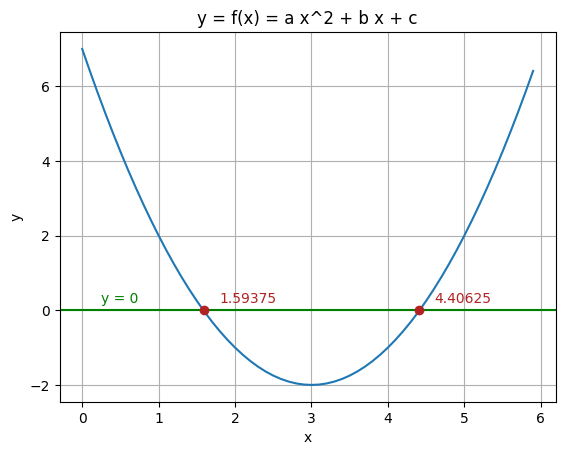

In [ ]:
x = np.arange(0, 6, 0.1)
y = coefs_da_eq[0] * np.power(x, 2) + coefs_da_eq[1] * x + coefs_da_eq[2]  # y = a.x^2 + b.x + c = 0

plt.plot(x, y)
plt.title(f'y = f(x) = a x^2 + b x + c')
# plt.title(f'y = f(x) = ({coefs_da_eq[0]}).x^2 + ({coefs_da_eq[1]}).x + ({coefs_da_eq[2]})')
plt.xlabel('x')
plt.ylabel('y')

plt.axhline(y=0, color='green', linestyle='-')
plt.text(0.25, +0.20, s='y = 0', color='green')

if n >= 0:  # se houver raízes reais
  for raiz in raizes:
    plt.plot(raiz, 0, marker="o", color='firebrick')
    plt.text(raiz+0.2, +0.2, s=str(raiz), color='firebrick')

plt.grid()

## **Comparando o tempo de execução e número de passos de cada implementação**

In [ ]:
try:
  print(f'\nEscolhendo uma precisão de {precisao} para achar a raiz de {num} (usando o intervalo {intervalo_ab}):\n'
        f'\n1ª implementação:\t\t\t\t{comparacao["implementacao_1"][0]:.2f} segundos ({1000 * comparacao["implementacao_1"][0]:.2f} ms), \t--> {comparacao["implementacao_1"][1]} passos'
        f'\n2ª implementação (usando biblioteca Numba):\t{1000 * comparacao["implementacao_2_numba"][0]:.2f} ms, \t\t\t--> {comparacao["implementacao_2_numba"][1]} passos ({comparacao["implementacao_1"][0] / comparacao["implementacao_2_numba"][0]:.1f} x mais rápido)'
        f'\n3ª implementação (método de bissecção):\t\t{1000 * comparacao["implementacao_3_bissecao"][0]:.2f} ms ({10**6 * comparacao["implementacao_3_bissecao"][0]:.2f} µs), \t\t--> {comparacao["implementacao_3_bissecao"][1]} passos ({comparacao["implementacao_1"][0] / comparacao["implementacao_3_bissecao"][0]:.1f} x mais rápido que a 1ª implementação)')
except KeyError as _:
  print(f'Uma das implementações não rodou de forma adequada, reveja os parâmetros de entrada no começo deste Notebook.')


Escolhendo uma precisão de 1e-07 para achar a raiz de 2 (usando o intervalo [1, 2]):

1ª implementação:				4.43 segundos (4429.75 ms), 	--> 8284271 passos
2ª implementação (usando biblioteca Numba):	137.55 ms, 			--> 8284271 passos (32.2 x mais rápido)
3ª implementação (método de bissecção):		0.66 ms (662.33 µs), 		--> 22 passos (6688.2 x mais rápido que a 1ª implementação)


### **Algumas comparações de tempo de execução (p/ referência)**

In [ ]:
# Para referência:
#
# Escolhendo uma precisão de 1e-07:
# 1ª implementação:				3.34 segundos (3336.58 ms) c/ 8284271 passos
# 2ª implementação (usando biblioteca Numba):	128.47 ms, 8284271 passos (26.0 x mais rápido)
# 3ª implementação (método de bissecção):		628.47 µs, 22 passos (5309.0 x mais rápido que a 1ª implementação)
#
# Escolhendo uma precisão de 1e-08:
# 1ª implementação:				48.19 segundos (48186.42 ms) c/ 82842713 passos
# 2ª implementação (usando biblioteca Numba):	269.37 ms, 82842713 passos (178.9 x mais rápido)
# 3ª implementação (método de bissecção):		665.90 µs, 26 passos (72362.5 x mais rápido que a 1ª implementação)